<a href="https://colab.research.google.com/github/motazsaad/IBM-Data-Science/blob/main/Python_EDABD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic Dataset

A commonly used dataset that is perfect for explaining data preparation in Python is the Titanic dataset. It includes a variety of data types and typical issues found in real-world datasets, such as missing values, duplicates, and categorical variables. Here's a brief overview of the dataset and how it can be used to demonstrate various data preparation techniques:

* Remove Duplicates: Check for and remove any duplicate entries.
* Handle Missing Data: Deal with missing values using various strategies like imputation, removal, or filling with specific values.
* ETL (Extract, Transform, Load): Demonstrate how to load the data, transform it (e.g., feature engineering, normalization), and prepare it for analysis or modeling.
* Categorical Data Handling: Convert categorical variables to numerical ones using techniques like one-hot encoding or label encoding.
* Data Normalization and Scaling: Scale features to ensure they have similar ranges.
* Feature Engineering: Create new features from existing ones to improve model performance.

# Step 1: Loading the Dataset
We'll use the pandas library to load the Titanic dataset. You can download the dataset from Kaggle or use the seaborn library, which has the dataset built-in.

In [ ]:
import pandas as pd
import seaborn as sns

# Load the Titanic dataset
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


# Step 2: Removing Duplicates
Check for and remove any duplicate rows.

In [ ]:
titanic.shape

(891, 15)

In [ ]:
titanic.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886     True
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [ ]:
# Check for duplicates
print(f"Number of duplicate rows: {titanic.duplicated().sum()}")

# Remove duplicates
titanic = titanic.drop_duplicates()

Number of duplicate rows: 107


# Step 3: Handling Missing Data

Identify missing data and decide how to handle it. Common strategies include removing rows with missing data, filling missing values with a placeholder, or imputing values.

In [ ]:
titanic.isnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Check for missing values
print(titanic.isnull().sum())


survived         0
pclass           0
sex              0
age            106
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           582
embark_town      2
alive            0
alone            0
dtype: int64


In [ ]:
# prompt: please get the percentage of missing values for each column, and please format the output

# Calculate the percentage of missing values for each column
missing_pct = (titanic.isnull().sum() / len(titanic)) * 100

# Format the output
missing_pct = missing_pct.apply('{:.2f}%'.format)

# Print the results
print(missing_pct)


survived        0.00%
pclass          0.00%
sex             0.00%
age            13.52%
sibsp           0.00%
parch           0.00%
fare            0.00%
embarked        0.26%
class           0.00%
who             0.00%
adult_male      0.00%
deck           74.23%
embark_town     0.26%
alive           0.00%
alone           0.00%
dtype: object


In [ ]:
titanic['embark_town'].mode()

In [ ]:
# take a copy
titanic_copy = titanic.copy()

# Remove rows with missing 'age' values
titanic = titanic.dropna(subset=['age'])

# Fill missing 'embark_town' values with the mode
print("embark_town mode:", titanic['embark_town'].mode())
titanic['embark_town'].fillna(titanic['embark_town'].mode()[0], inplace=True)
titanic

embark_town mode: 0    Southampton
Name: embark_town, dtype: object


<ipython-input-40-c470c0e0437c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['embark_town'].fillna(titanic['embark_town'].mode()[0], inplace=True)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,0,2,male,28.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
# prompt: drop the column deck
 # (74% is missing )

#titanic = titanic.drop('deck', axis=1)
titanic.drop('deck', axis=1, inplace=True)
titanic

<ipython-input-41-e09db5f53722>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic.drop('deck', axis=1, inplace=True)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,0,2,male,28.0,0,0,10.5000,S,Second,man,True,Southampton,no,True
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,Queenstown,no,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [ ]:
titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [ ]:
# prompt: using titanic_copy df, show how to fill missing age with average

# Calculate the average age
average_age = titanic_copy['age'].mean()
print('average age')

# Fill missing age values with the average
titanic_copy['age'].fillna(average_age, inplace=True)

# Check for missing values
print(titanic_copy.isnull().sum())


average age
survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           582
embark_town      2
alive            0
alone            0
dtype: int64


# Step 4: Categorical Data Handling
Convert categorical variables to numerical ones. For example, we can use one-hot encoding for the 'sex' and 'embarked' columns.

In [ ]:
columns=['sex', 'embarked']
titanic[columns]

,sex,embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S
...,...,...
883,male,S
885,female,Q
887,female,S
889,male,C


In [ ]:
# Convert categorical columns to numerical
titanic = pd.get_dummies(titanic, columns=['sex', 'embarked'], drop_first=True)
titanic

,survived,pclass,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone,sex_male,embarked_Q,embarked_S
0,0,3,22.0,1,0,7.2500,Third,man,True,Southampton,no,False,True,False,True
1,1,1,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False,False,False,False
2,1,3,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True,False,False,True
3,1,1,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False,False,False,True
4,0,3,35.0,0,0,8.0500,Third,man,True,Southampton,no,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,0,2,28.0,0,0,10.5000,Second,man,True,Southampton,no,True,True,False,True
885,0,3,39.0,0,5,29.1250,Third,woman,False,Queenstown,no,False,False,True,False
887,1,1,19.0,0,0,30.0000,First,woman,False,Southampton,yes,True,False,False,True
889,1,1,26.0,0,0,30.0000,First,man,True,Cherbourg,yes,True,True,False,False


# Step 5: Feature Engineering
Create new features that might be useful for analysis or modeling. For example, we can create a new feature for the family size by combining the 'sibsp' and 'parch' columns.

In the Titanic dataset, the sibsp and parch columns provide information about the family relationships of the passengers:

* sibsp: This column stands for "siblings/spouses aboard." It represents the number of siblings or spouses the passenger had on the Titanic. For example, a value of 1 means the passenger had one sibling or spouse aboard, while a value of 0 means the passenger had no siblings or spouses aboard.

* parch: This column stands for "parents/children aboard." It represents the number of parents or children the passenger had on the Titanic. For example, a value of 2 means the passenger had two parents or children aboard, while a value of 0 means the passenger had no parents or children aboard.

Combining these two columns can give a sense of the passenger's family size on the ship. For instance, a passenger with sibsp = 1 and parch = 2 had a total of three family members aboard (one sibling/spouse and two parents/children).

Here's an example to clarify:

| Passenger | sibsp | parch | Explanation                                      |
|-----------|-------|-------|--------------------------------------------------|
| A         | 0     | 0     | No siblings/spouses or parents/children aboard.  |
| B         | 1     | 0     | One sibling/spouse aboard, no parents/children.  |
| C         | 0     | 2     | No siblings/spouses, two parents/children aboard.|



# Family Size Feature
We can create a new feature called family_size by combining these two columns with the passenger themselves:

In [ ]:
# Create a new feature 'family_size'
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1
titanic[['sibsp', 'parch', 'family_size']]


,sibsp,parch,family_size
0,1,0,2
1,1,0,2
2,0,0,1
3,1,0,2
4,0,0,1
...,...,...,...
883,0,0,1
885,0,5,6
887,0,0,1
889,0,0,1


# Data visualization

The Iris dataset is one of the best datasets for demonstrating a wide range of common data visualizations. It's simple, well-structured, and has both numerical and categorical data, which makes it ideal for showcasing various plotting techniques. Here are some common visualizations that can be effectively demonstrated using the Iris dataset:

1. Scatter Plots: To show relationships between numerical variables.
2. Histograms: To show the distribution of a single numerical variable.
3. Box Plots: To show the distribution and detect outliers in numerical variables.
4. Pair Plots: To show pairwise relationships in the dataset.
5. Violin Plots: To show the distribution and density of the data.
6. Bar Charts: To compare categorical data.
7. Heatmaps: To show the correlation matrix between numerical variables.

In [ ]:
# Load the Iris dataset
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


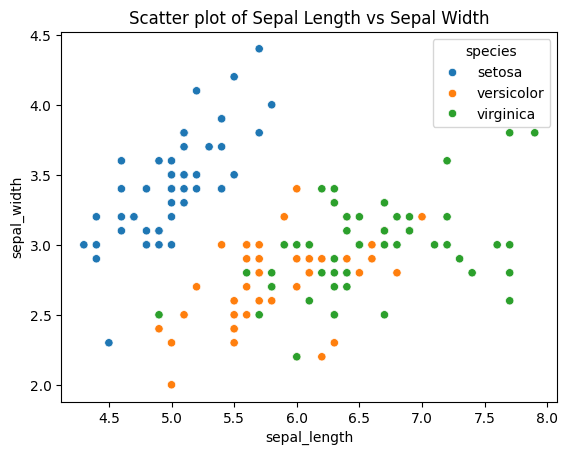

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Scatter plot
# Visualizes the relationship between sepal length and sepal width, colored by species
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=iris)
plt.title('Scatter plot of Sepal Length vs Sepal Width')
plt.show()

The plot reveals that the three species of Iris flowers are distinctly separated based on their sepal dimensions. Iris setosa (blue points) is clearly separated from Iris versicolor (orange points) and Iris virginica (green points) by having smaller sepal lengths and wider sepal widths. Iris versicolor and Iris virginica overlap more, but there are still regions where they can be distinguished based on these two features.

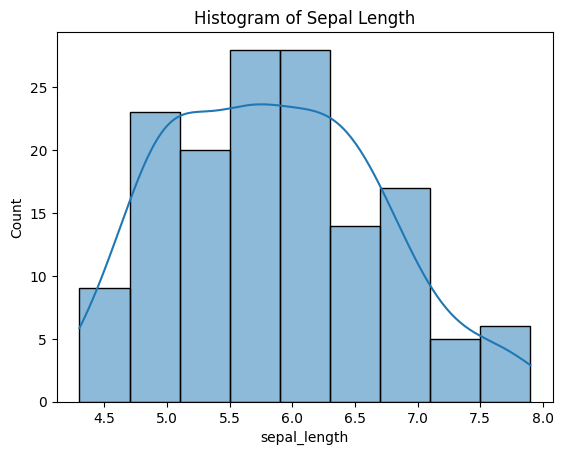

In [ ]:
# Histogram
# Shows the distribution of sepal length with a kernel density estimate (KDE) overlay
sns.histplot(iris['sepal_length'], kde=True)
plt.title('Histogram of Sepal Length')
plt.show()

Sepal length is approximately normally distributed across all species combined, with a slight peak around 5.5-6.0 cm.
There are no significant outliers in sepal length based on the distribution. Sepal lengths below 4 cm and above 7.5 cm are less common.

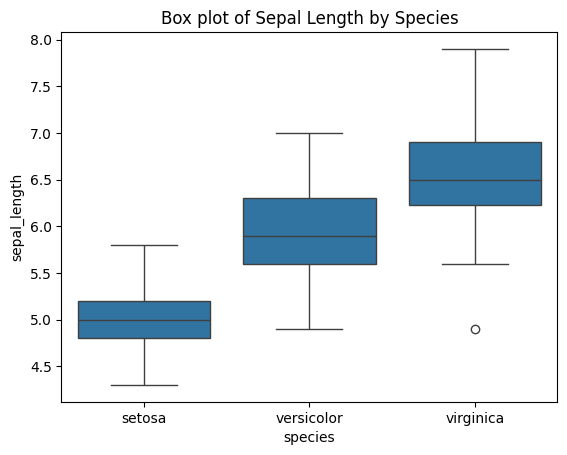

In [ ]:
# Box plot
# Displays the distribution of sepal length for each species, highlighting the median and potential outliers
sns.boxplot(x='species', y='sepal_length', data=iris)
plt.title('Box plot of Sepal Length by Species')
plt.show()

Setosa has a significantly shorter median sepal length compared to Versicolor and Virginica.
Virginica tends to have the widest range of sepal lengths among the three species, with potential outliers at both ends of the distribution.

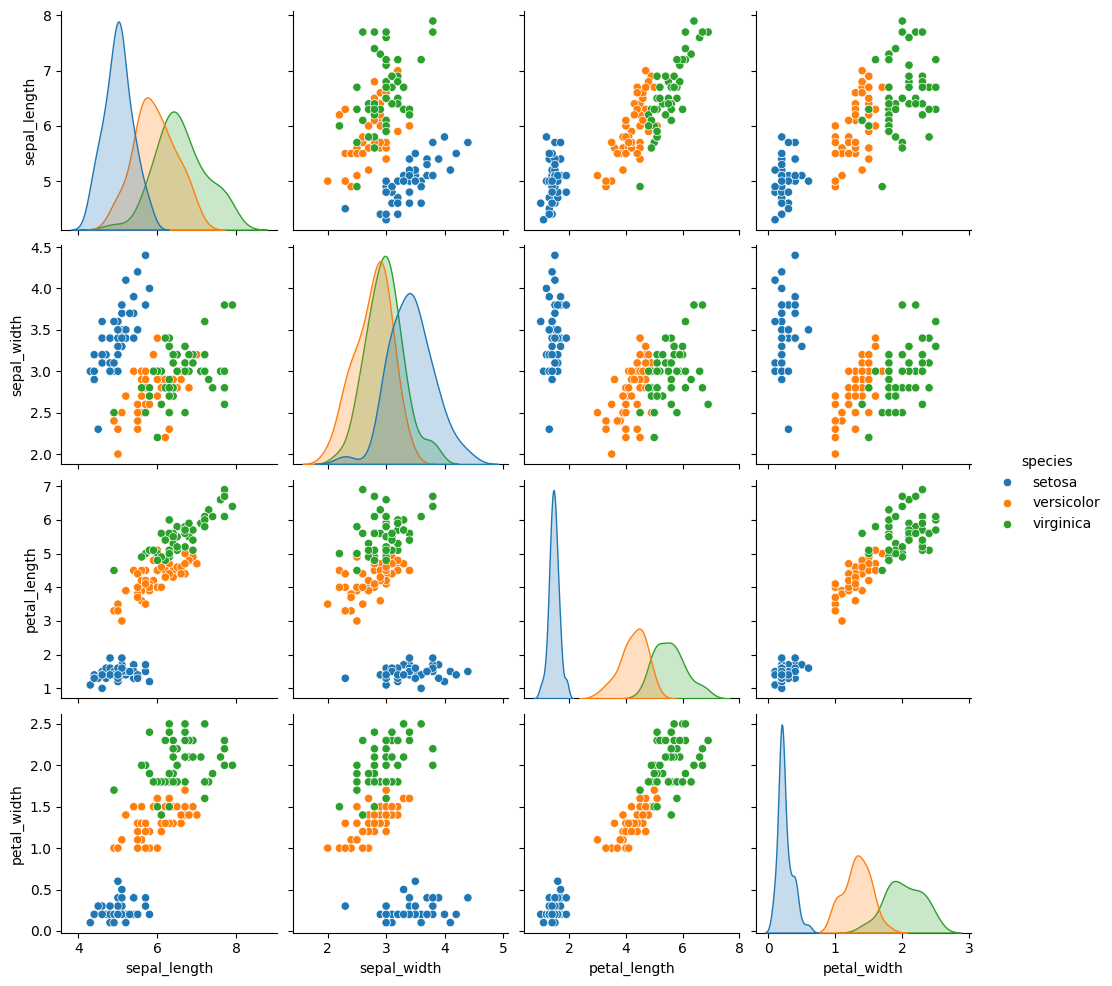

In [ ]:
# Pair plot
# Provides a grid of scatter plots for all pairs of features, colored by species
sns.pairplot(iris, hue='species')
plt.show()

* Sepal length vs. sepal width: Shows similar patterns as the individual scatter plot, with clear clustering of Setosa based on wider sepals.
* Petal length and width: Shows a strong correlation and clear separation of species, with Setosa having smaller and more distinct petals compared to Versicolor and Virginica.

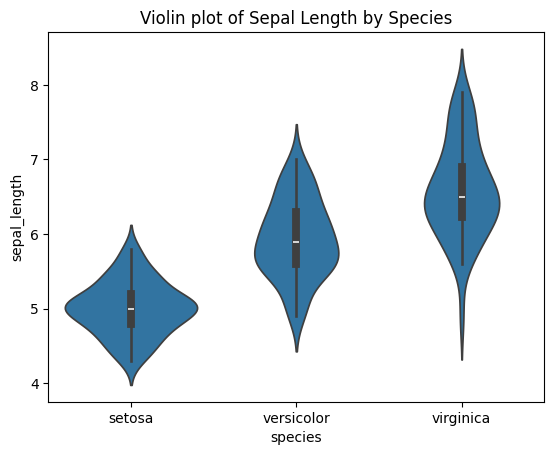

In [ ]:
# Violin plot
# Combines a box plot and a KDE, showing the distribution and density of sepal length by species
sns.violinplot(x='species', y='sepal_length', data=iris)
plt.title('Violin plot of Sepal Length by Species')
plt.show()

Similar to the box plot, it confirms that Setosa generally has shorter sepal lengths compared to Versicolor and Virginica.
Provides a clearer view of the density of data points at different sepal lengths within each species.

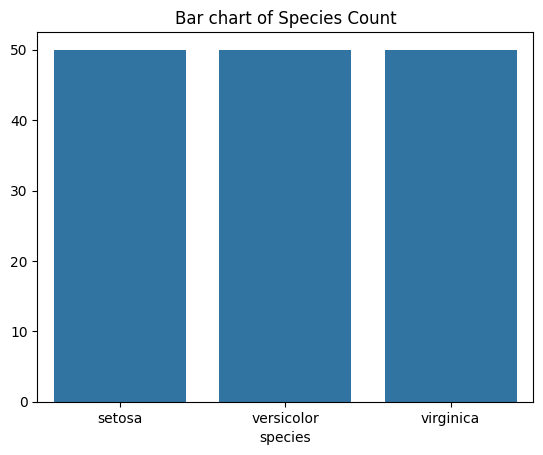

In [ ]:
# Bar chart
# Displays the count of each species in the dataset
species_counts = iris['species'].value_counts()
sns.barplot(x=species_counts.index, y=species_counts.values)
plt.title('Bar chart of Species Count')
plt.show()

The dataset is balanced with 50 samples for each species (Setosa, Versicolor, Virginica).
This helps in understanding the distribution of data points among the species and confirms that there are no missing values.

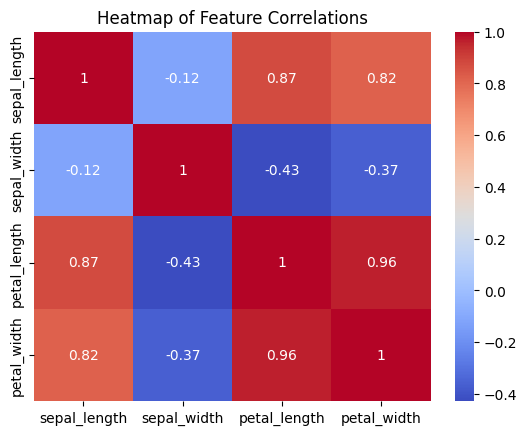

In [ ]:
# Heatmap
# Shows the correlation matrix between the numerical features in the dataset
corr = iris.drop(columns='species').corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Heatmap of Feature Correlations')
plt.show()

Sepal length and width have a moderate positive correlation.
Petal length and width have a strong positive correlation.
This indicates that as one of these features increases, the other tends to increase as well, which can aid in feature selection for modeling.

# Summary
Each visualization in the Iris dataset provides unique insights into the characteristics of the different species (Setosa, Versicolor, Virginica) based on their sepal and petal dimensions. These visualizations help us understand the distributions, relationships between variables, and overall structure of the dataset, which is crucial for further analysis and modeling tasks.

# Load CSV data with Pandas dataframes

In [ ]:
import pandas as pd

df = pd.read_csv('/content/sample_data/california_housing_test.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


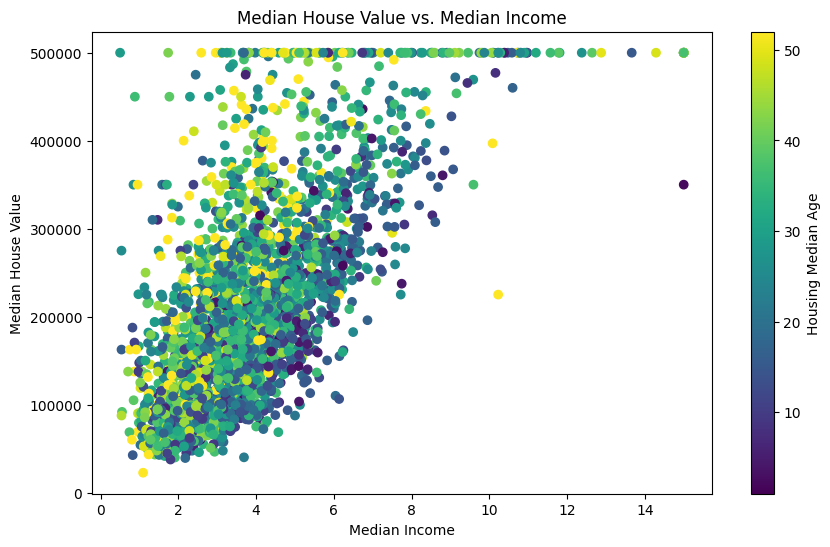

In [ ]:
# @title Median House Value vs. Median Income

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(df['median_income'], df['median_house_value'], c=df['housing_median_age'], cmap='viridis')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Median House Value vs. Median Income')
_ = plt.colorbar(label='Housing Median Age')

In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.00000
mean,-119.589200,35.63539,28.845333,2599.578667,529.950667,1402.798667,489.91200,3.807272,205846.27500
std,1.994936,2.12967,12.555396,2155.593332,415.654368,1030.543012,365.42271,1.854512,113119.68747
min,-124.180000,32.56000,1.000000,6.000000,2.000000,5.000000,2.00000,0.499900,22500.00000
25%,-121.810000,33.93000,18.000000,1401.000000,291.000000,780.000000,273.00000,2.544000,121200.00000
50%,-118.485000,34.27000,29.000000,2106.000000,437.000000,1155.000000,409.50000,3.487150,177650.00000
75%,-118.020000,37.69000,37.000000,3129.000000,636.000000,1742.750000,597.25000,4.656475,263975.00000
max,-114.490000,41.92000,52.000000,30450.000000,5419.000000,11935.000000,4930.00000,15.000100,500001.00000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           3000 non-null   float64
 1   latitude            3000 non-null   float64
 2   housing_median_age  3000 non-null   float64
 3   total_rooms         3000 non-null   float64
 4   total_bedrooms      3000 non-null   float64
 5   population          3000 non-null   float64
 6   households          3000 non-null   float64
 7   median_income       3000 non-null   float64
 8   median_house_value  3000 non-null   float64
dtypes: float64(9)
memory usage: 211.1 KB


# Employee XLSX data

In [ ]:
emp_df = pd.read_excel('/content/emp.xlsx')
emp_df

,FirstName,LastName,Department,Salary,Skill1,Skill2,Skill3
0,Rahul,Patel,Sales,90000,C,HTML,CSS
1,Chaitanya,Shah,RD,95000,CSsharp,SQL,Azure
2,Ashna,Jain,HR,93000,Python,Debugging,Teams
3,Mansi,Garg,Sales,81000,Java,Hibernate,XP
4,Vipul,Gupta,HR,84000,ADF,Synapse,Azure


In [ ]:
emp_df['FullName'] = emp_df['FirstName'] + ' ' + emp_df['LastName']
tax  = 0.2
emp_df['NetSalary'] = emp_df['Salary'] - emp_df['Salary'] * tax
emp_df

,FirstName,LastName,Department,Salary,Skill1,Skill2,Skill3,FullName,NetSalary
0,Rahul,Patel,Sales,90000,C,HTML,CSS,Rahul Patel,72000.0
1,Chaitanya,Shah,RD,95000,CSsharp,SQL,Azure,Chaitanya Shah,76000.0
2,Ashna,Jain,HR,93000,Python,Debugging,Teams,Ashna Jain,74400.0
3,Mansi,Garg,Sales,81000,Java,Hibernate,XP,Mansi Garg,64800.0
4,Vipul,Gupta,HR,84000,ADF,Synapse,Azure,Vipul Gupta,67200.0


In [ ]:
cols = ['FullName', 'Salary', 'NetSalary']
emp_df[cols]

,FullName,Salary,NetSalary
0,Rahul Patel,90000,72000.0
1,Chaitanya Shah,95000,76000.0
2,Ashna Jain,93000,74400.0
3,Mansi Garg,81000,64800.0
4,Vipul Gupta,84000,67200.0


# Palmer Penguins dataset
Another excellent dataset for visualization purposes is the Palmer Penguins dataset. This dataset is often used as an alternative to the Iris dataset and provides more complex and interesting features to work with. It includes data on three different species of penguins collected from three islands in the Palmer Archipelago, Antarctica. The dataset includes various measurements such as bill length, bill depth, flipper length, and body mass, along with categorical variables like species, island, and sex.


Why the Palmer Penguins Dataset?
* Diverse Features: It has a mix of numerical and categorical variables.
* Interesting Comparisons: It allows for comparisons across species, islands, and sexes.
* Real-World Relevance: It provides a more complex dataset closer to real-world scenarios.
Example Visualizations
Here is how you can create various visualizations with the Palmer Penguins dataset:

1. Scatter Plots
2. Histograms
3. Box Plots
4. Pair Plots
5. Violin Plots
6. Bar Charts
7. Heatmaps



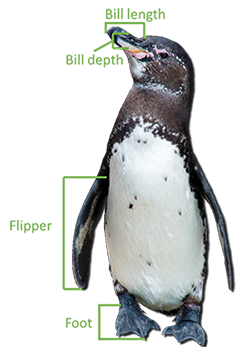

In [ ]:
!pip install palmerpenguins seaborn matplotlib pandas

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from palmerpenguins import load_penguins

# Load the Palmer Penguins dataset
penguins = load_penguins()
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


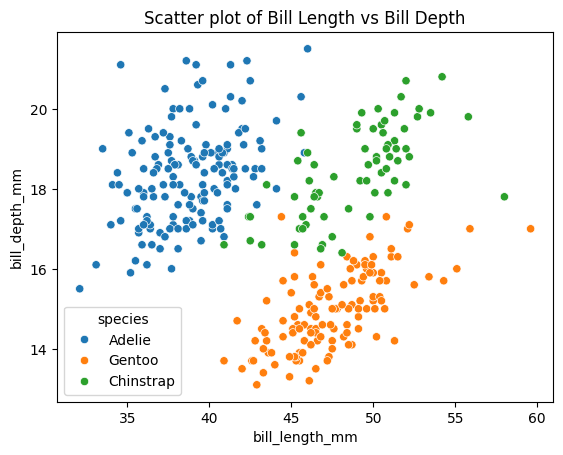

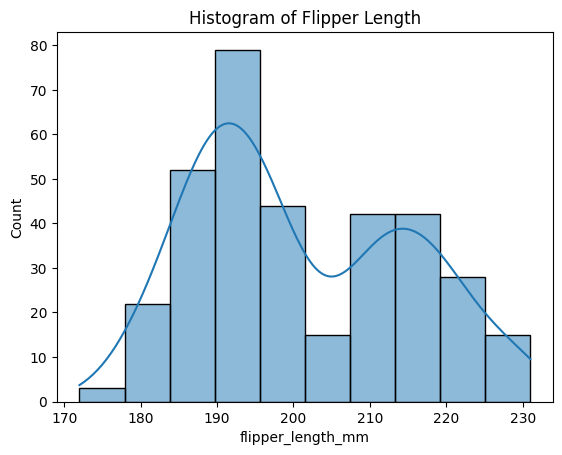

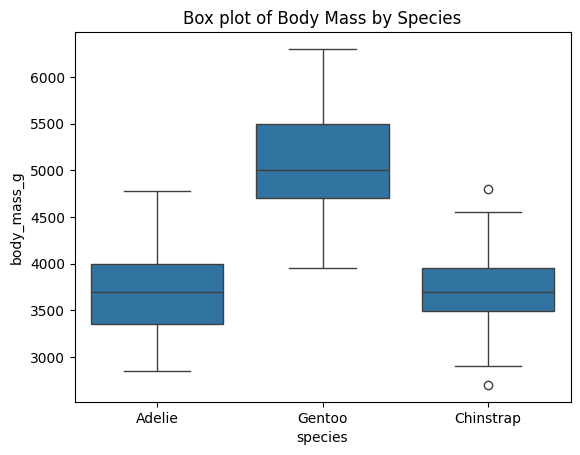

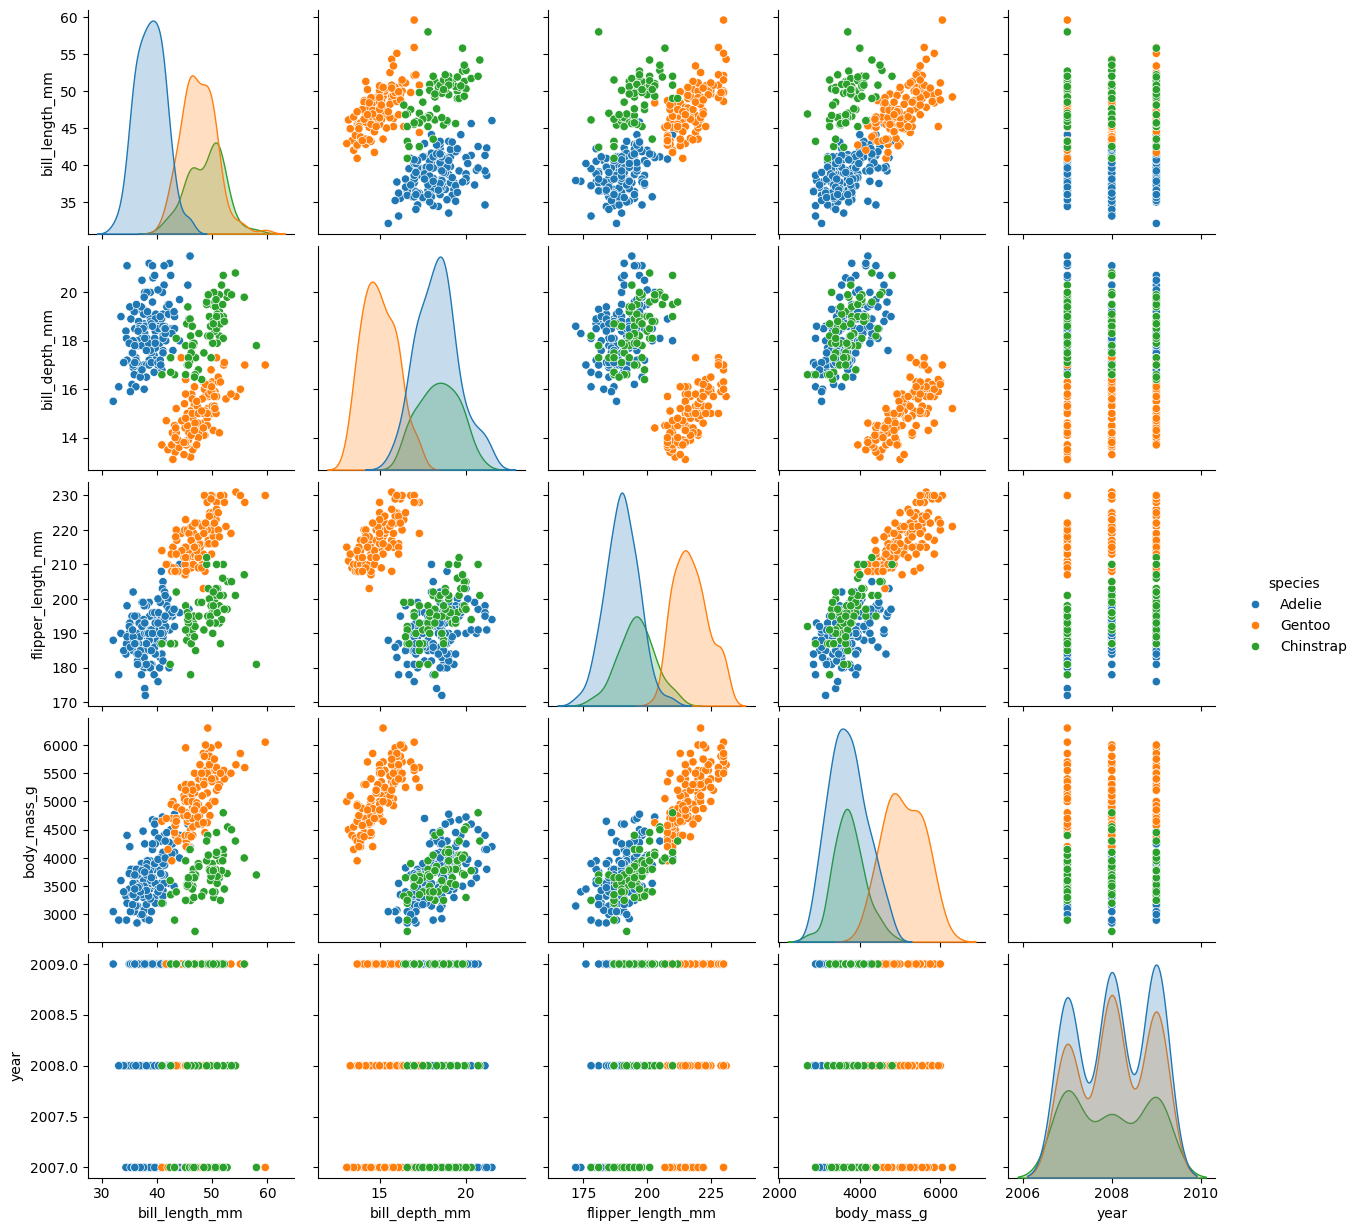

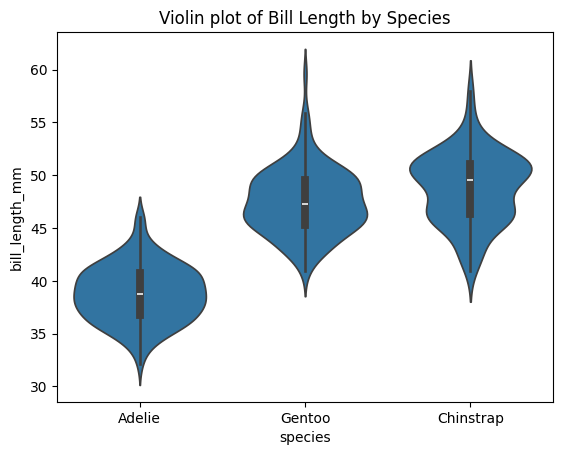

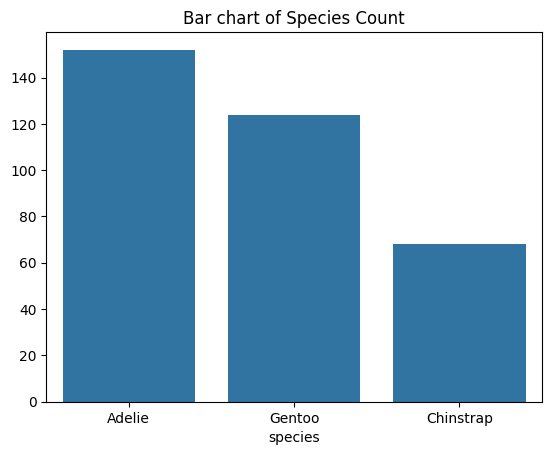

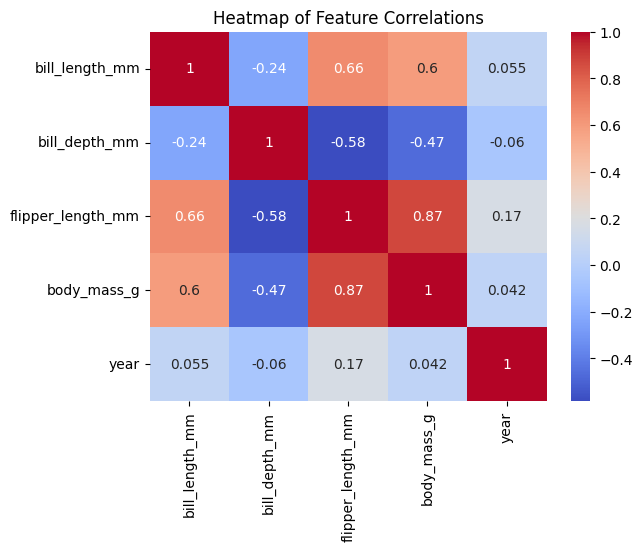

In [ ]:


# Scatter plot
# Visualizes the relationship between bill length and bill depth, colored by species
sns.scatterplot(x='bill_length_mm', y='bill_depth_mm', hue='species', data=penguins)
plt.title('Scatter plot of Bill Length vs Bill Depth')
plt.show()

# Histogram
# Shows the distribution of flipper length with a kernel density estimate (KDE) overlay
sns.histplot(penguins['flipper_length_mm'], kde=True)
plt.title('Histogram of Flipper Length')
plt.show()

# Box plot
# Displays the distribution of body mass for each species, highlighting the median and potential outliers
sns.boxplot(x='species', y='body_mass_g', data=penguins)
plt.title('Box plot of Body Mass by Species')
plt.show()

# Pair plot
# Provides a grid of scatter plots for all pairs of features, colored by species
sns.pairplot(penguins.dropna(), hue='species')
plt.show()

# Violin plot
# Combines a box plot and a KDE, showing the distribution and density of bill length by species
sns.violinplot(x='species', y='bill_length_mm', data=penguins)
plt.title('Violin plot of Bill Length by Species')
plt.show()

# Bar chart
# Displays the count of each species in the dataset
species_counts = penguins['species'].value_counts()
sns.barplot(x=species_counts.index, y=species_counts.values)
plt.title('Bar chart of Species Count')
plt.show()

# Heatmap
# Shows the correlation matrix between the numerical features in the dataset
corr = penguins.drop(columns=['species', 'island', 'sex']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Heatmap of Feature Correlations')
plt.show()


# Interpretation of Each Visual
1. Scatter Plot: Visualizes the relationship between bill length and bill depth, showing distinct clusters for different species.
2. Histogram: Displays the distribution of flipper lengths, helping identify common flipper lengths and outliers.
3. Box Plot: Highlights differences in body mass among species, showing the median, quartiles, and potential outliers.
4. Pair Plot: Provides a comprehensive view of pairwise relationships between all numerical features, colored by species.
5. Violin Plot: Combines box plot and KDE to show the distribution and density of bill length for each species.
6. Bar Chart: Shows the count of each penguin species, useful for understanding the dataset's balance.
7. Heatmap: Displays correlations between numerical features, helping identify which features are related.

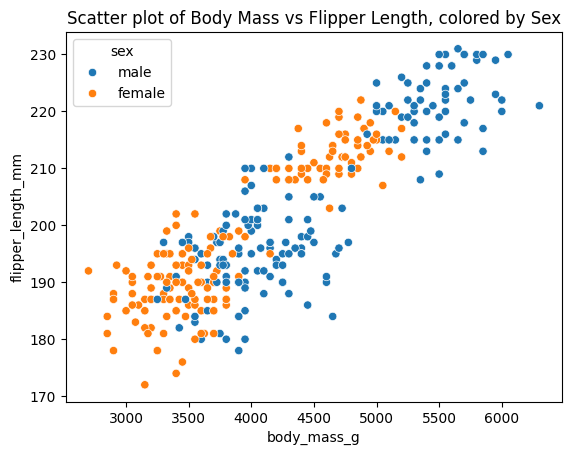

In [ ]:
# prompt: plot the relation between  body mass and flibber lenght and include sex in hue

# Plot the relationship between body mass and flipper length, including sex in hue
sns.scatterplot(x='body_mass_g', y='flipper_length_mm', hue='sex', data=penguins)
plt.title('Scatter plot of Body Mass vs Flipper Length, colored by Sex')
plt.show()
